In [1]:
from pandas import read_csv
from os import getcwd
import matplotlib.pyplot as plt


NUM_PARTICIPANTS = 20

FITTS_ID_LIST = [2.788, 3.68, 3.68, 4.623]

In [2]:
##########################################################################################
def get_raw_data(part_id, trial_id):
    
    # csv_logs_dir = str(Path(__file__).parents[2]) + "\\ros2_ws\src\cpp_pubsub\data_logging\csv_logs"
    csv_logs_dir = "..\\..\\ros2_ws\src\cpp_pubsub\data_logging\csv_logs"
    part_header_file = csv_logs_dir + "\part" + str(part_id) + "\\trial" + str(trial_id) + ".csv"
    raw_df = read_csv(part_header_file)
    # print("\n Finished reading raw csv file! \n")
    
    return raw_df


##########################################################################################
def get_exp_info():
    
    part_header_file = "all_parts_joined.csv"
    raw_df = read_csv(part_header_file)
    # print("\n Finished reading raw csv file! \n")
    return raw_df

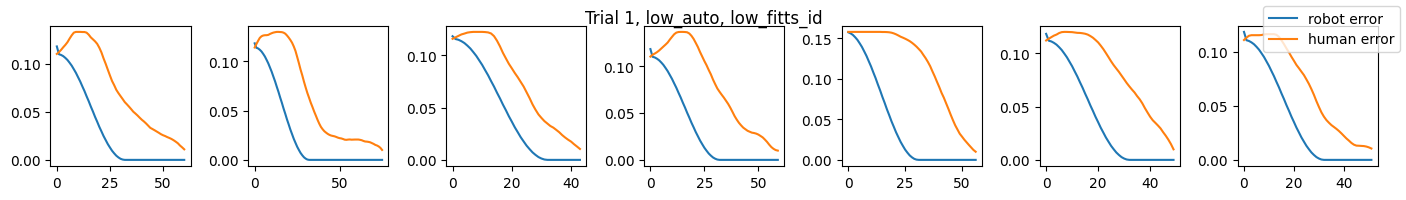

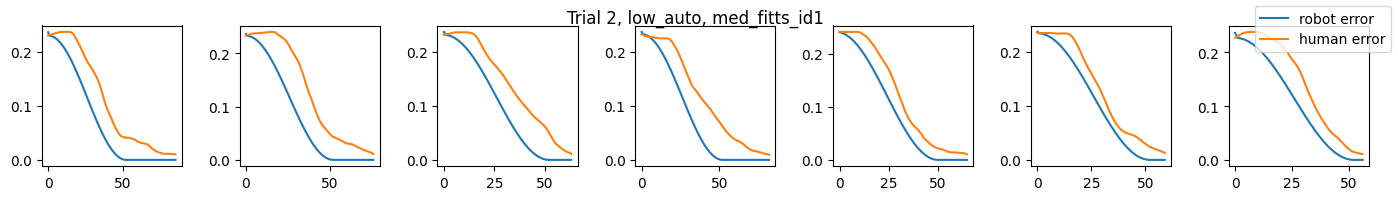

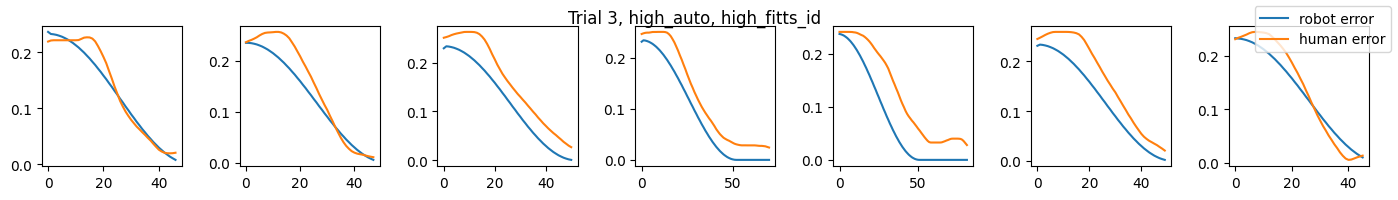

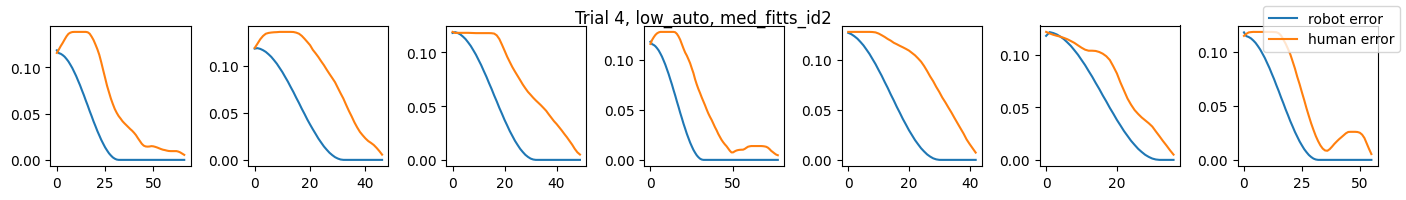

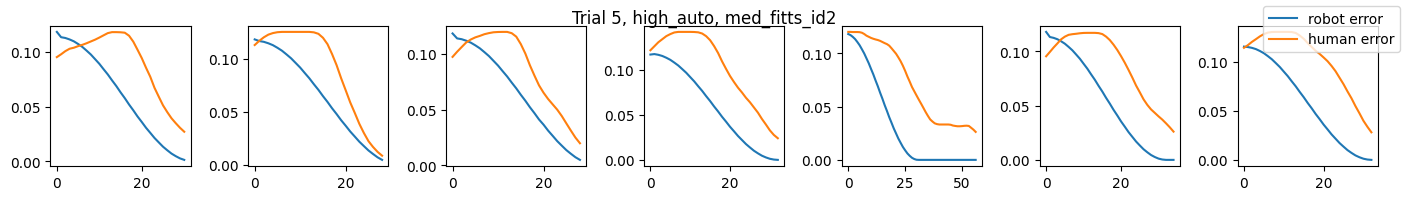

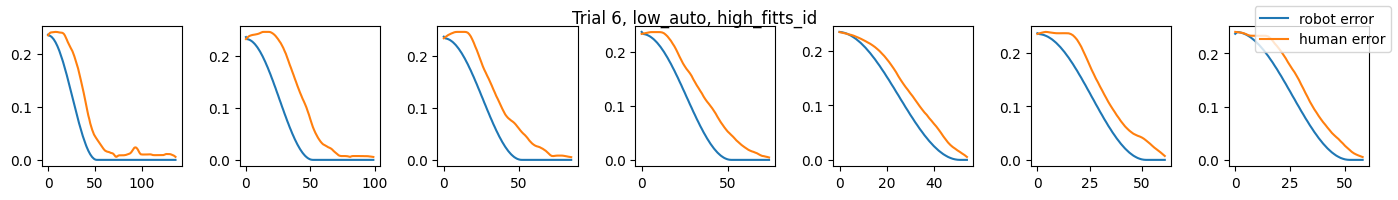

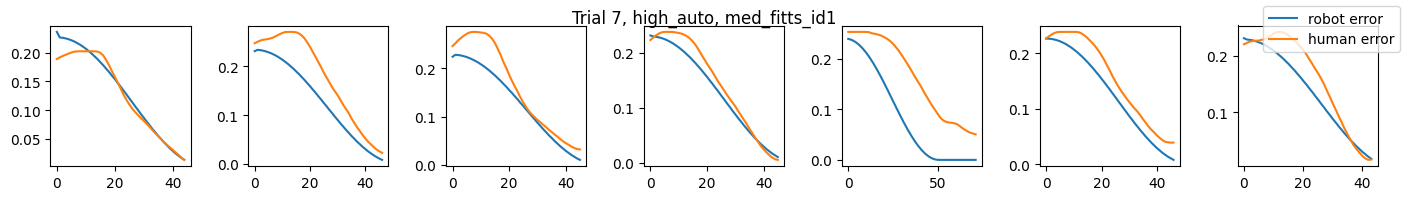

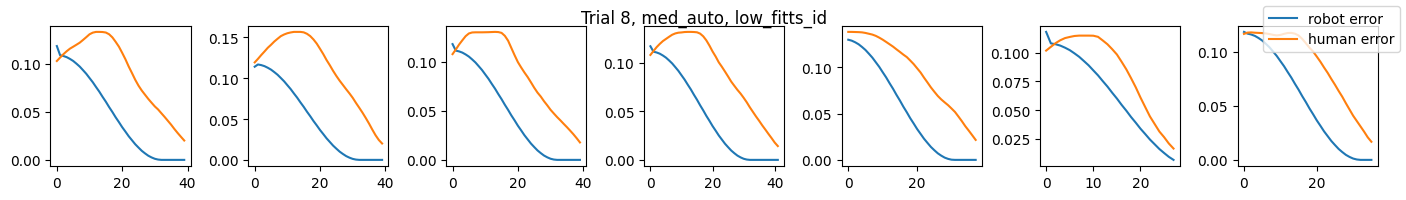

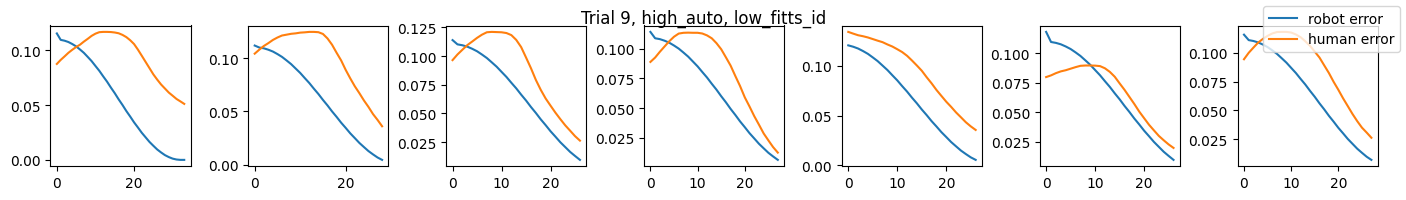

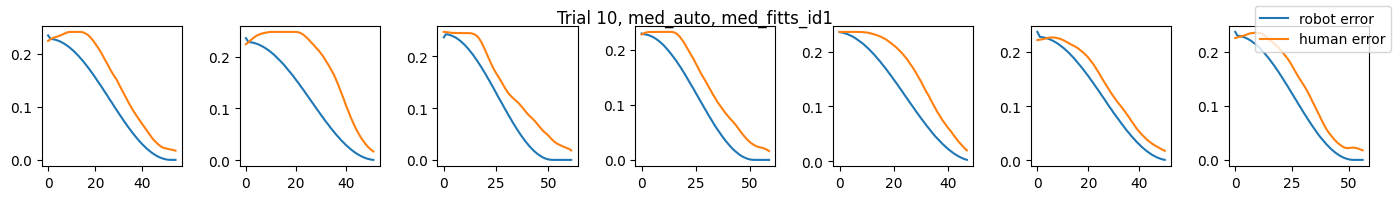

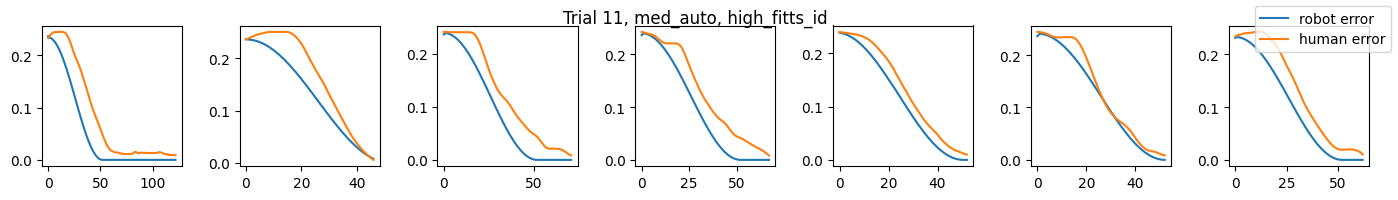

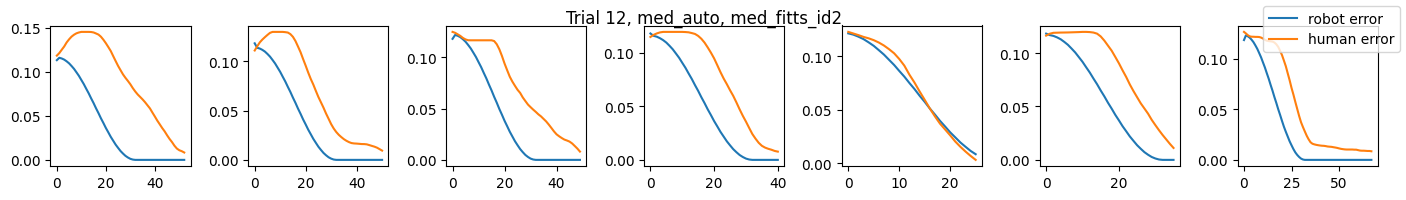

In [3]:
exp_info_df = get_exp_info()
part1_exp_info = exp_info_df[exp_info_df['part_id']==1].reset_index(drop=True)

for trial_id in range(1, 13):

    df = get_raw_data(1, trial_id+12)
    trial_info = part1_exp_info[part1_exp_info['trial_number']==trial_id]
    auto_level = trial_info["auto_level"].tolist()[0]
    fitts_id_level = trial_info["fitts_id_level"].tolist()[0]

    fig, ax = plt.subplots(1, 7, figsize=(14,2))
    fig.tight_layout()

    for target_id in range(1, 8):
        this_target_df = df[df['target_id']==target_id].reset_index(drop=True)
        human_err_list = this_target_df['h_err'].tolist()
        robot_err_list = this_target_df['r_err'].tolist()
        ax[target_id-1].plot(robot_err_list)
        ax[target_id-1].plot(human_err_list)
        
    fig.suptitle("Trial %d, %s, %s" % (trial_id, auto_level, fitts_id_level))
    fig.legend(["robot error", "human error"])
    plt.show()